In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
import seaborn
from sklearn.preprocessing import StandardScaler


In [33]:
df = pd.read_csv("7hnz0037D3.csv")
df = df[['loc. (actual) [km]', 'voltage [V]']]
#df = df.set_index('loc. (actual) [km]')
df.sort_index(inplace=True)
df_0 = pd.read_csv("7hnz0037.csv")
df_0 = df_0[['loc. (actual) [km]', 'voltage [V]']]
#df_0 = df_0.set_index('loc. (actual) [km]')
df_0.sort_index(inplace=True)

In [34]:
scaler = StandardScaler()
outliers_fraction = 0.01

In [35]:
np_scaled = scaler.fit_transform(X=df_0)
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

In [36]:
model =  OneClassSVM(nu=0.95 * outliers_fraction) #nu=0.95 * outliers_fraction  + 0.05
#data = pd.DataFrame(np_scaled)
model.fit(df_0)

/home/aggelos-i3/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.0095, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [41]:
df['anomaly26'] = pd.Series(model.predict(df_s))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

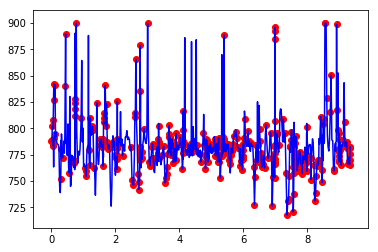

In [42]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots()

a = df.loc[df['anomaly26'] == 1, ['loc. (actual) [km]', 'voltage [V]']] #anomaly

ax.plot(df['loc. (actual) [km]'], df['voltage [V]'], color='blue')
ax.scatter(a['loc. (actual) [km]'],a['voltage [V]'], color='red')
plt.show()